In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [2]:
#constant
K_NEI=750

In [3]:
#read csv files that contain the training and testing data
DS2_train=pd.read_csv("out/A2.4/DS2_train.csv",header=None)
DS2_train=np.array(DS2_train)
DS2_test=pd.read_csv("out/A2.4/DS2_test.csv",header=None)
DS2_test=np.array(DS2_test)

In [4]:
 np.set_printoptions(threshold='nan')
    
#define function that returns eucledian distance
def euc_dis(x1,x2):
    d=0.0
    for i in range(0,x1.shape[0]-1):
        d=d+(x1[i]-x2[i])**2
    return math.sqrt(d)
        
#define function that returns the average of the k-nn
def k_nn(x,ds,k):
    cnt=1
    value_list=np.zeros([1,1])
    d_list=np.zeros([1,1])
    z=0
    
    for i in range(0,ds.shape[0]):
        temp=euc_dis(x,ds[i,0:20])    
        #print value_list,"\n", d_list,"\n"
        #print ds[i,20],"\n", temp,"\n"
        if (cnt<k):

            b=cnt-1
            while (temp<d_list[b,0] and b>=0):
                b=b-1

            value_list=np.insert(value_list, [b+1], ds[i,20], axis=0)

            d_list=np.insert(d_list, [b+1], temp, axis=0)

            if z==0:
                value_list = np.delete(value_list, (0), axis=0)
                d_list = np.delete(d_list, (0), axis=0)
                cnt=cnt-1


            cnt=cnt+1
            z=z+1  

        else:

            b=k-1
            while (temp<d_list[b,0] and b>=0):
                b=b-1    
            value_list=np.insert(value_list, b+1, ds[i,20], axis=0)
            value_list = np.delete(value_list, (k), axis=0)
            d_list=np.insert(d_list, b+1, temp, axis=0)
            d_list = np.delete(d_list, (k), axis=0)
            
    k_nn_pred=np.zeros([1,k])       
    for h in range(1,k+1):
        r=np.sum(value_list[1:h+1,0])/float(h)
        if r>0.5:
            k_nn_pred[0,h-1]=1
        else:
            k_nn_pred[0,h-1]=0
    return  k_nn_pred

In [5]:
#test the algorithm on the test set and store the predicted values in array called DS1_test_pred
DS2_test_pred=np.zeros([DS2_test.shape[0],K_NEI])

for j in range(0,DS2_test.shape[0]):
    DS2_test_pred[j,:]=k_nn(DS2_test[j,0:20],DS2_train,K_NEI)    
    

In [6]:
#save the predictions
#DS2_test_pred=pd.DataFrame(DS2_test_pred)
#DS2_test_pred.to_csv('out/A2.5-2/DS2_test_pred.csv', index=False, header=False)

In [7]:
# read the results that were previously saved
#DS2_test_pred=pd.read_csv("out/A2.5-2/DS2_test_pred.csv",header=None)


In [8]:
#Compute the accuracy, precision, recall and F-measure for all values of k
#DS2_test_pred=np.array(DS2_test_pred) 
perf_mes=np.zeros([4,K_NEI])
i=1


while i<K_NEI+1: # loop through k's
    tp=0
    tn=0
    fp=0
    fn=0
    
    for d in range(0,1200):# loop through examples

        if (DS2_test_pred[d,i-1]):#pred=1
            if(DS2_test[d,20]):       #real=1, tp
                tp=tp+1         
              
            else:
                fp=fp+1               #real=0, fp
               
        else:
            if(DS2_test[d,20]):       #pred=0
                fn=fn+1               #real=1, fn
               
            else:
                tn=tn+1               #real=0, tn  
               
    acc=(tp+tn)/1200.0 
    perf_mes[0,i-1]=acc
    pre=tp/float(tp+fp)
    perf_mes[1,i-1]=pre
    rec=tp/float(tp+fn)
    perf_mes[2,i-1]=rec
    f_mes=(2.0*pre*rec)/float(pre+rec)
    perf_mes[3,i-1]=f_mes
    
    i=i+1



In [9]:
#find the best hyperparameter
a=0
a_in=0
b=0
b_in=0
c=0
c_in=0
d=0
d_in=0

i=1
while i<K_NEI:
    temp1=perf_mes[:,i]
    if(temp1[0]>a): 
        a=temp1[0]
        a_in = i
    if(temp1[1]>b):
        b=temp1[1]
        b_in = i
    if(temp1[2]>c):
        c=temp1[2]
        c_in = i
    if(temp1[3]>d):
        d=temp1[3]
        d_in = i
    i=i+1
print a, a_in, b, b_in, c, c_in, d, d_in

0.561666666667 12 0.591939546599 9 0.50974025974 4 0.537785588752 12


In [10]:
#save the performance mesures
#perf_mes=pd.DataFrame(perf_mes) 
#perf_mes.to_csv('out/A2.5-2/perf_mes.csv', index=False, header=False)

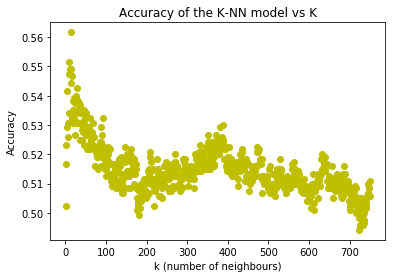

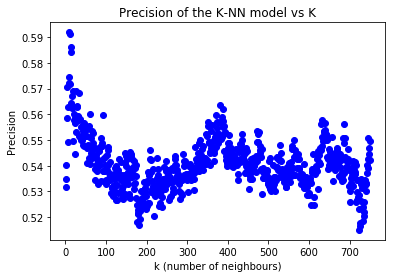

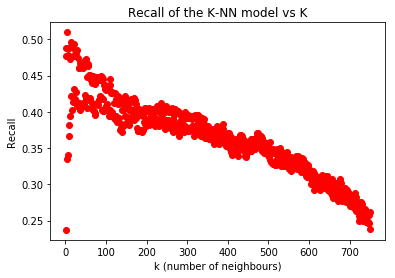

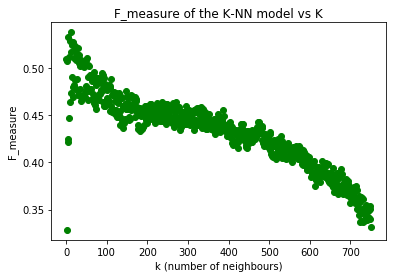

In [11]:
#plot the diff perormance measures vs k

perf_mes=np.array(perf_mes)
t1 = np.arange(1, K_NEI+1, 1)
plt.plot(t1,perf_mes[0,:], 'yo')
plt.ylabel('Accuracy')
plt.xlabel('k (number of neighbours)')
plt.title('Accuracy of the K-NN model vs K')
#plt.savefig('plots/A2.5-2/Accuracy.png')
plt.show()

plt.plot(t1,perf_mes[1,:], 'bo')
plt.ylabel('Precision')
plt.xlabel('k (number of neighbours)')
plt.title('Precision of the K-NN model vs K')
#plt.savefig('plots/A2.5-2/Precision.png')
plt.show()

plt.plot(t1,perf_mes[2,:], 'ro')
plt.ylabel('Recall')
plt.xlabel('k (number of neighbours)')
plt.title('Recall of the K-NN model vs K')
#plt.savefig('plots/A2.5-2/Recall.png')
plt.show()

plt.plot(t1,perf_mes[3,:], 'go')
plt.ylabel('F_measure')
plt.xlabel('k (number of neighbours)')
plt.title('F_measure of the K-NN model vs K')
#plt.savefig('plots/A2.5-2/F_measure.png')
plt.show()